In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [140]:
df_train= pd.read_csv('D:\ML\Hackerearth_submit\8503d976798f11ea\Dataset\Train.csv')

In [141]:
df_train.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,label
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1


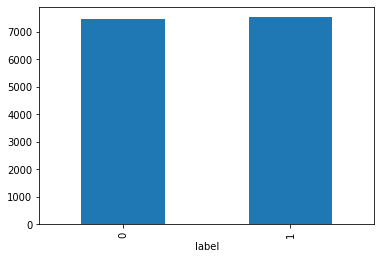

In [142]:
df_train.groupby('label')['label'].count().plot.bar()
plt.show()

In [143]:
## It is a balanced dataset

In [144]:
data = df_train[['comment','parent_comment']]

In [145]:
data.replace('[^a-zA-Z]',' ',regex=True,inplace=True)

D:\AnacondaDistribution\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [146]:
data.head()

,comment,parent_comment
0,Well let s be honest here they don t actuall...,They should shut the fuck up and let the commu...
1,Well I didn t need evidence to believe in com...,You need evidence to kill people I thought we...
2,Who does an official promo in p,BMW S R Official Promo
3,Grotto koth was the best,Not really that memorable lol if you want memo...
4,Neal s back baby,James Neal hit on Zach Parise


In [147]:
data['comment']=data['comment'].str.lower()
data['parent_comment']=data['parent_comment'].str.lower()

D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
data.head()

,comment,parent_comment
0,well let s be honest here they don t actuall...,they should shut the fuck up and let the commu...
1,well i didn t need evidence to believe in com...,you need evidence to kill people i thought we...
2,who does an official promo in p,bmw s r official promo
3,grotto koth was the best,not really that memorable lol if you want memo...
4,neal s back baby,james neal hit on zach parise


In [149]:
data['final_comment']=data[['comment','parent_comment']].apply(lambda x : ''.join(x),axis=1)

D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
data.head()

,comment,parent_comment,final_comment
0,well let s be honest here they don t actuall...,they should shut the fuck up and let the commu...,well let s be honest here they don t actuall...
1,well i didn t need evidence to believe in com...,you need evidence to kill people i thought we...,well i didn t need evidence to believe in com...
2,who does an official promo in p,bmw s r official promo,who does an official promo in p bmw ...
3,grotto koth was the best,not really that memorable lol if you want memo...,grotto koth was the bestnot really that memora...
4,neal s back baby,james neal hit on zach parise,neal s back babyjames neal hit on zach parise


In [151]:
df['final_comment']= data['final_comment']

In [152]:
df.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,label,final_comment
0,uid_590555,"Well, let's be honest here, they don't actuall...",2015-04,0,They should shut the fuck up and let the commu...,2,2,starcitizen,Combat_Wombatz,0,well let s be honest here they don t actuall...
1,uid_671762,"Well, I didn't need evidence to believe in com...",2016-12,-1,You need evidence to kill people? I thought we...,6,-1,EnoughCommieSpam,starkadd,1,well i didn t need evidence to believe in com...
2,uid_519689,"Who does an ""official promo"" in 360p?",2013-11,0,2014 BMW S1000R: Official Promo,3,3,motorcycles,phybere,0,who does an official promo in p bmw ...
3,uid_788362,Grotto koth was the best,2015-09,0,Not really that memorable lol if you want memo...,2,2,hcfactions,m0xyMC,1,grotto koth was the bestnot really that memora...
4,uid_299252,Neal's back baby,2015-11,0,James Neal hit on Zach Parise,-5,-5,hockey,Somuch101,1,neal s back babyjames neal hit on zach parise


In [ ]:
## Used TfIdfVectorizer for Vectorizing the comments and parent comments

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(stop_words='english',ngram_range=(2, 2),max_features=112537 )

In [154]:
review =tf.fit_transform(df['final_comment'])

In [155]:
review

<15000x112537 sparse matrix of type '<class 'numpy.float64'>'
	with 138009 stored elements in Compressed Sparse Row format>

In [156]:
X=review
y=df['label']

In [157]:
set(y)

{0, 1}

In [101]:
X_train, X_test,y_train,y_test =train_test_split(review,y,test_size=0.2,random_state=0)

<IPython.core.display.Javascript object>

In [102]:
X_train.shape, X_test.shape

((12000, 112537), (3000, 112537))

In [138]:
print(y_train.value_counts() , y_test.value_counts())

1    6039
0    5961
Name: label, dtype: int64 0    1512
1    1488
Name: label, dtype: int64


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)

In [104]:
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [105]:
from sklearn.linear_model import LogisticRegression

In [ ]:
## Logistic Regression is used for this problem statement

In [106]:
lr = LogisticRegression()

In [107]:
lr.fit(X_train,y_train)

D:\AnacondaDistribution\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_pred = lr.predict(X_test)

In [109]:
lr.score(X_test,y_test)

0.5256666666666666

<IPython.core.display.Javascript object>

Text(51.0, 0.5, 'Actual')

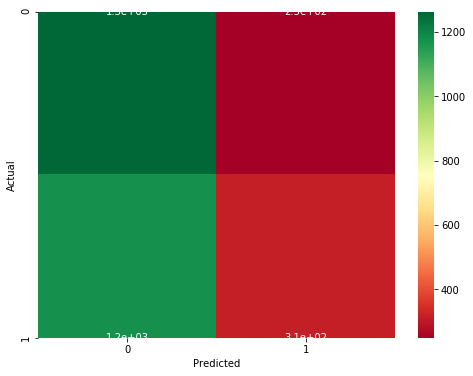

In [110]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='RdYlGn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [111]:
score=100*f1_score(y_test,y_pred,average='weighted')

In [112]:
print(score)

47.42577092448464


In [ ]:
## The final F1 score is 47.42

In [113]:
## Now test Data

In [114]:
df_test= pd.read_csv('D:\ML\Hackerearth_submit\8503d976798f11ea\Dataset\Test.csv')

In [115]:
df_test.head()

,ID,comment,date,down,parent_comment,score,top,topic,user
0,uid_764784,Meanwhile if I pick my boxer up to move him to...,2016-01,0,Part of the Family Fun,2,2,gifs,Cameltoe-Swampdonkey
1,uid_67552,Thats what you get for using an unfair advanta...,2015-03,0,received a warning for hacking while overclock...,1,1,h1z1,Gothika_47
2,uid_240490,only to be later faced with thousands of dolla...,2010-09,0,Running shoes and race entries. I started runn...,1,1,Frugal,tells
3,uid_56568,What a thoughtful rebuttal to a well articulat...,2015-12,0,"Actually, you should get over your self. There...",-1,-1,CFB,YourToothbrush
4,uid_875860,"Yes, major life experiences that demand a grea...",2014-04,0,"As a bonus, it was with his ex, months after t...",-5,-5,AdviceAnimals,drunken_trophy_wife


In [116]:
data_test = df_train[['comment','parent_comment']]

In [117]:
data_test.replace('[^a-zA-Z]',' ',regex=True,inplace=True)

D:\AnacondaDistribution\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [118]:
data_test.head()

,comment,parent_comment
0,Well let s be honest here they don t actuall...,They should shut the fuck up and let the commu...
1,Well I didn t need evidence to believe in com...,You need evidence to kill people I thought we...
2,Who does an official promo in p,BMW S R Official Promo
3,Grotto koth was the best,Not really that memorable lol if you want memo...
4,Neal s back baby,James Neal hit on Zach Parise


In [119]:
data_test['comment']=data_test['comment'].str.lower()
data_test['parent_comment']=data_test['parent_comment'].str.lower()

D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [120]:
data_test['final_comment']=data_test[['comment','parent_comment']].apply(lambda x : ''.join(x),axis=1)

D:\AnacondaDistribution\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
data_test.head()

,comment,parent_comment,final_comment
0,well let s be honest here they don t actuall...,they should shut the fuck up and let the commu...,well let s be honest here they don t actuall...
1,well i didn t need evidence to believe in com...,you need evidence to kill people i thought we...,well i didn t need evidence to believe in com...
2,who does an official promo in p,bmw s r official promo,who does an official promo in p bmw ...
3,grotto koth was the best,not really that memorable lol if you want memo...,grotto koth was the bestnot really that memora...
4,neal s back baby,james neal hit on zach parise,neal s back babyjames neal hit on zach parise


In [122]:
df_test['final_comment']= data_test['final_comment']

In [123]:
df_test.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,final_comment
0,uid_764784,Meanwhile if I pick my boxer up to move him to...,2016-01,0,Part of the Family Fun,2,2,gifs,Cameltoe-Swampdonkey,well let s be honest here they don t actuall...
1,uid_67552,Thats what you get for using an unfair advanta...,2015-03,0,received a warning for hacking while overclock...,1,1,h1z1,Gothika_47,well i didn t need evidence to believe in com...
2,uid_240490,only to be later faced with thousands of dolla...,2010-09,0,Running shoes and race entries. I started runn...,1,1,Frugal,tells,who does an official promo in p bmw ...
3,uid_56568,What a thoughtful rebuttal to a well articulat...,2015-12,0,"Actually, you should get over your self. There...",-1,-1,CFB,YourToothbrush,grotto koth was the bestnot really that memora...
4,uid_875860,"Yes, major life experiences that demand a grea...",2014-04,0,"As a bonus, it was with his ex, months after t...",-5,-5,AdviceAnimals,drunken_trophy_wife,neal s back babyjames neal hit on zach parise


In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf= TfidfVectorizer(stop_words='english',ngram_range=(2, 2),max_features=112537 )

In [125]:
review_test =tf.fit_transform(df_test['final_comment'])

In [126]:
X_test_submit=review_test

In [127]:
y_test_pred = lr.predict(X_test_submit)

In [128]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [131]:
df_test['label']= y_test_pred

In [132]:
df_test.head()

,ID,comment,date,down,parent_comment,score,top,topic,user,final_comment,overall,label
0,uid_764784,Meanwhile if I pick my boxer up to move him to...,2016-01,0,Part of the Family Fun,2,2,gifs,Cameltoe-Swampdonkey,well let s be honest here they don t actuall...,0,0
1,uid_67552,Thats what you get for using an unfair advanta...,2015-03,0,received a warning for hacking while overclock...,1,1,h1z1,Gothika_47,well i didn t need evidence to believe in com...,0,0
2,uid_240490,only to be later faced with thousands of dolla...,2010-09,0,Running shoes and race entries. I started runn...,1,1,Frugal,tells,who does an official promo in p bmw ...,0,0
3,uid_56568,What a thoughtful rebuttal to a well articulat...,2015-12,0,"Actually, you should get over your self. There...",-1,-1,CFB,YourToothbrush,grotto koth was the bestnot really that memora...,0,0
4,uid_875860,"Yes, major life experiences that demand a grea...",2014-04,0,"As a bonus, it was with his ex, months after t...",-5,-5,AdviceAnimals,drunken_trophy_wife,neal s back babyjames neal hit on zach parise,0,0


In [133]:
df_test[['ID','label']].to_csv(r'D:\ML\Hackerearth_submit\8503d976798f11ea\Dataset\Arijit_sample_submissionV1.csv',index=False)